## Minimizing Churn Rate Through Analysis of Financial Habits
## Md.Manir Uddin

- In this case study we will be working for a fintech company that provides a subscription product to its users which allows     them to manage their bank accounts (saving accounts, credit cards, etc.) provides them with personalized coupons, informs       them of the latest low-APR loans available in market, and educates them on the best available methods to save money(like       videos on saving on taxes, free courses on financial health,etc)


- We are in charge of identifying users who are likely to cancel their subscription so that the company can start building news   features which the customers may be interest in. These features can increase engagement and interest of our users towards the   product.

#### Project Goal
- Using classification techniques, the main purpose of this project is to create an algorithm that could predict if a customer   it’s going to churn a subscription product. In this way, the company will adquire knowledge about which products should         improve or offer to minimize this churn rate.


#### Table of Contents:
- 1-Exploratory Data Analysis
- 2-Preprocessing the data
- 3-Training the model
- 4-Evaluating the model
- 5-Feature selection
 - 5.1-Evaluating the new model
- 6-Conclusions

# Importing Libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
dataset=pd.read_csv('churn_data.csv')

# Exploratory Data Analysis

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.tail()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
26995,24291,1,24.0,R,580.0,0,0,0,0,0,...,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,NaN,0,0,2,0,0,...,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,NaN,0,0,37,0,0,...,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,...,0,0,0,0,Aries,1,0,27.0,0.90,1
26999,52752,1,34.0,na,525.0,0,0,4,0,0,...,0,0,0,0,Cancer,0,0,4.0,0.13,0


In [5]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [6]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


# cleaning data

In [6]:
dataset[dataset.credit_score < 300]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
7347,45685,1,22.0,na,3.0,0,0,16,0,0,...,0,0,0,0,na,0,0,16.0,0.53,0
9244,33603,0,28.0,na,2.0,0,0,5,0,0,...,0,0,0,0,Aquarius,0,0,1.0,0.04,0
11978,2465,0,32.0,R,3.0,42,5,56,42,0,...,0,0,0,0,Libra,0,0,24.0,0.80,1
18857,33700,1,22.0,na,2.0,0,0,0,0,0,...,0,0,0,0,Gemini,0,0,6.0,0.20,0


In [7]:
dataset = dataset[dataset.credit_score >= 300] 

In [8]:
dataset

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
5,3120,1,32.0,R,567.0,5,3,111,5,0,...,0,0,0,0,Taurus,0,0,55.0,1.83,0
6,41406,0,21.0,na,475.0,0,0,4,0,0,...,0,0,0,0,Cancer,0,0,2.0,0.07,0
8,21269,0,28.0,R,548.0,0,0,0,0,2,...,0,0,0,0,Sagittarius,0,0,26.0,0.87,1
9,25788,0,23.0,na,658.0,1,0,87,1,0,...,0,0,0,0,Aquarius,0,0,32.0,1.07,0
11,25899,0,41.0,O,625.0,14,0,116,13,0,...,0,0,0,0,Virgo,0,0,65.0,2.17,0
12,20839,0,20.0,na,550.0,0,0,135,0,0,...,0,0,0,0,Libra,0,0,66.0,2.20,1
13,13019,0,27.0,O,567.0,2,1,48,2,0,...,0,0,0,0,Gemini,0,0,30.0,1.00,0


# Removing NAN

In [9]:
dataset.isna().any() 

user                       False
churn                      False
age                        False
housing                    False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [11]:
dataset.isna().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score                  0
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             1190
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

## Histograms 

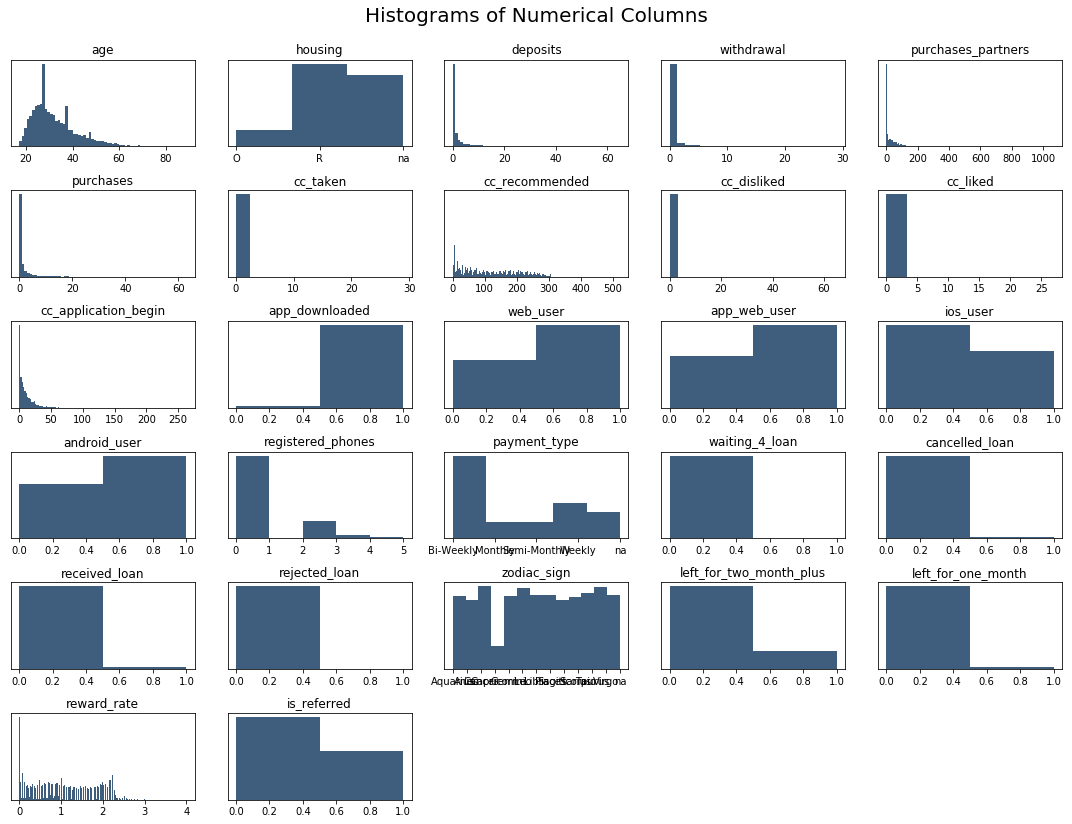

In [12]:
## Histograms
dataset2 = dataset.drop(columns = ['user', 'churn'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



## Pie Plots

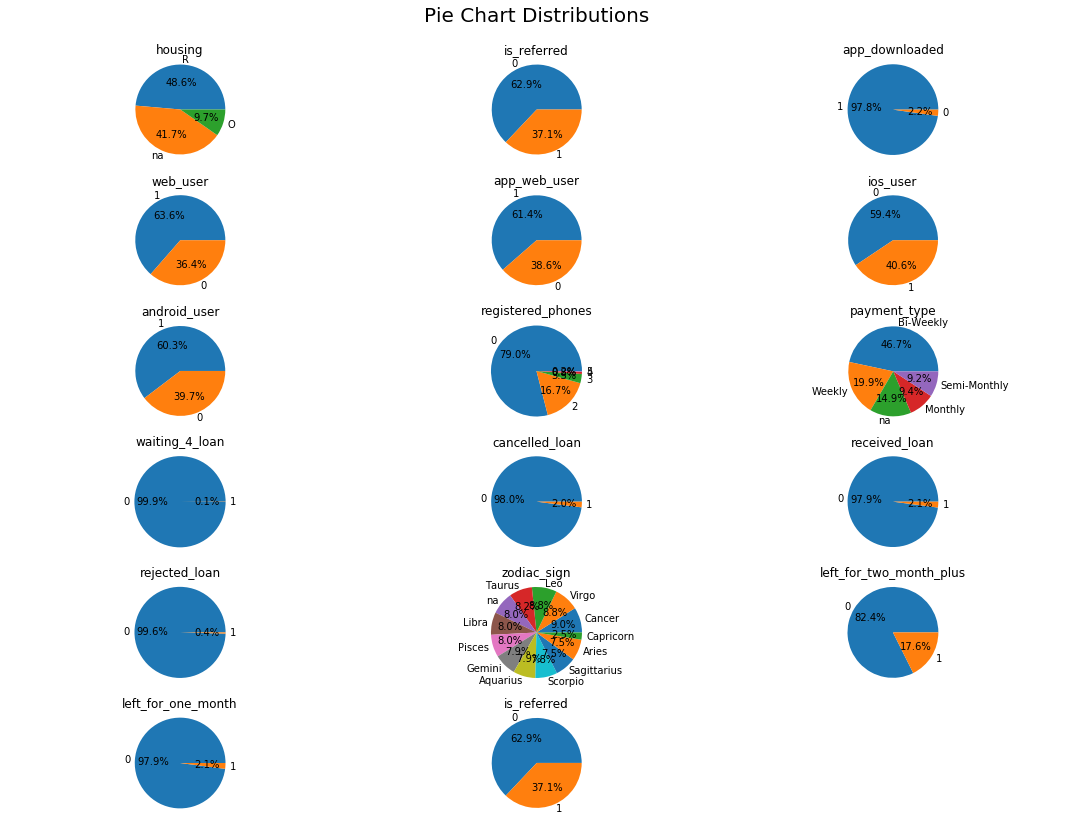

In [13]:

## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


## Exploring Uneven Features 

In [15]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts() 
dataset[dataset2.cancelled_loan == 1].churn.value_counts() 
dataset[dataset2.received_loan == 1].churn.value_counts() 
dataset[dataset2.rejected_loan == 1].churn.value_counts() 
dataset[dataset2.left_for_one_month == 1].churn.value_counts() 

1    207
0    184
Name: churn, dtype: int64

In [16]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts() 

0    15
1     3
Name: churn, dtype: int64

In [17]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts() 

0    194
1    187
Name: churn, dtype: int64

In [18]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    233
0    162
Name: churn, dtype: int64

In [19]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    64
0    17
Name: churn, dtype: int64

In [20]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    207
0    184
Name: churn, dtype: int64

## Correlation with Response Variable



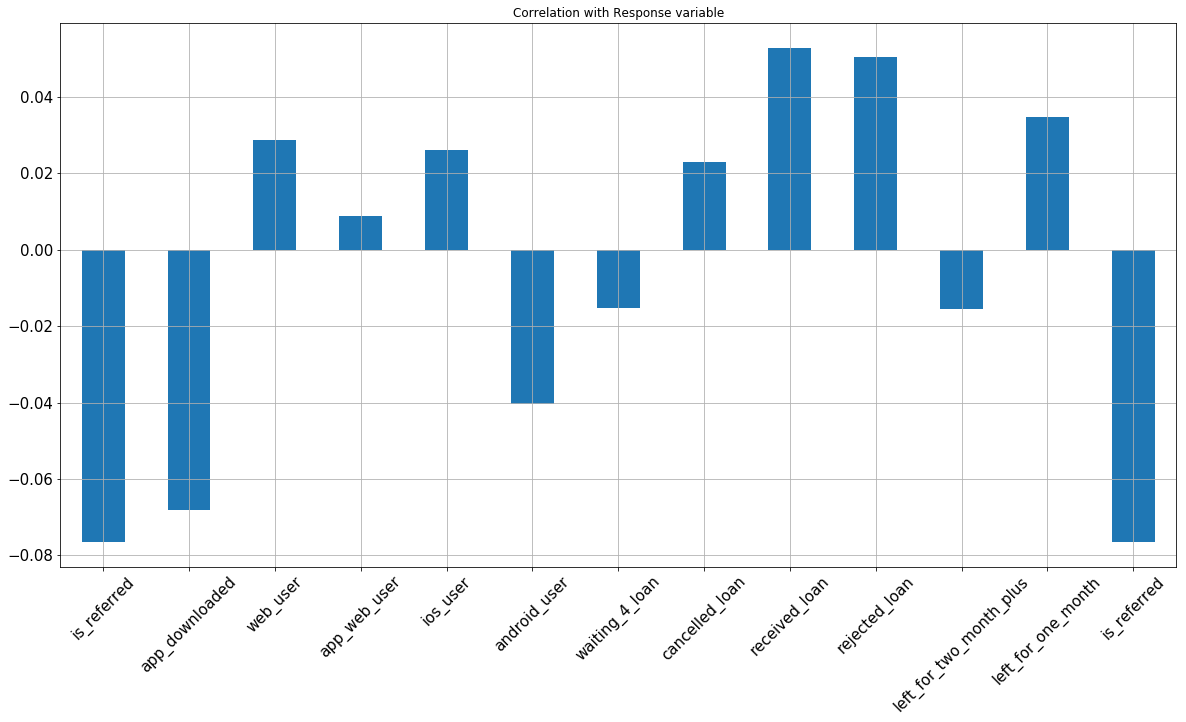

In [21]:
 
dataset2.drop(columns = ['housing', 'payment_type', 
                         'registered_phones', 'zodiac_sign'] 
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10), 
              title = 'Correlation with Response variable', 
              fontsize = 15, rot = 45, 
              grid = True)

## Correlation Matrix 

In [22]:
## Correlation Matrix 
sn.set(style="white")  
# Compute the correlation matrix 
corr = dataset.drop(columns = ['user', 'churn']).corr()  
# Generate a mask for the upper triangle 
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

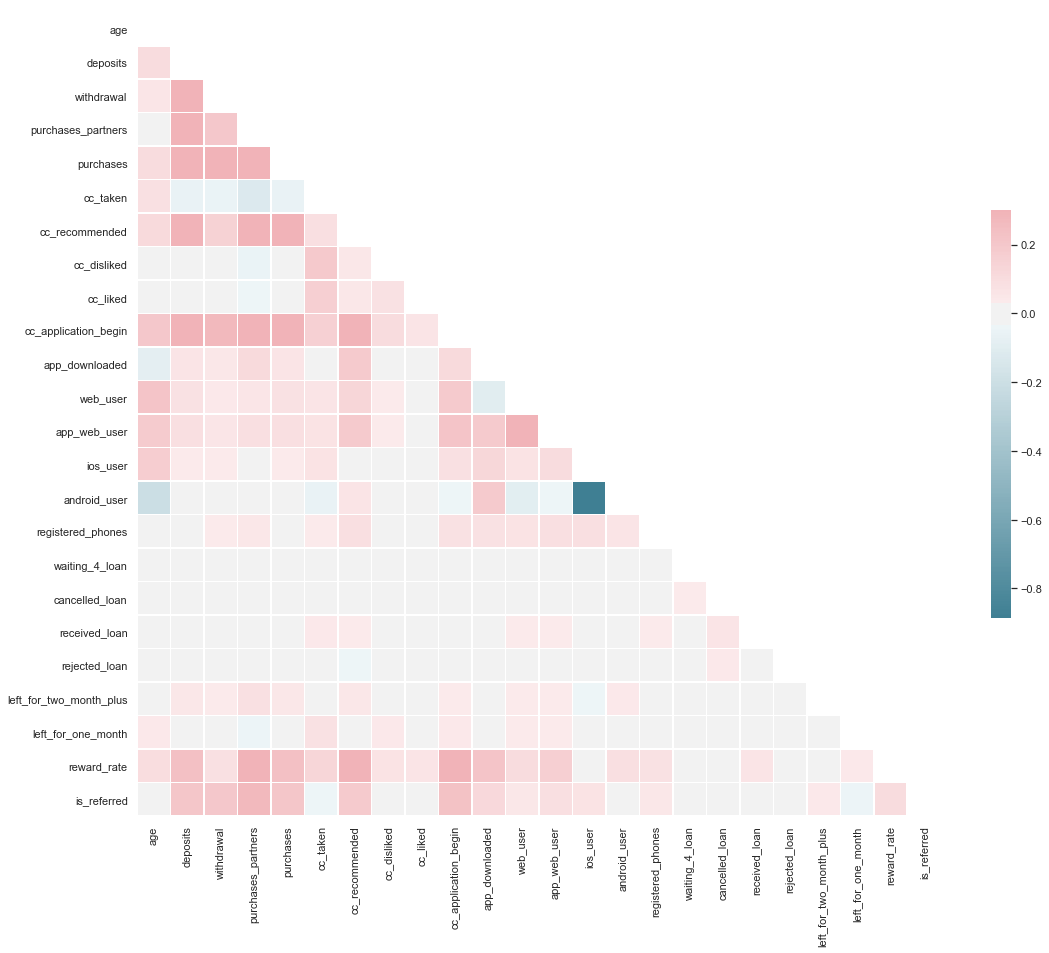

In [24]:
# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(18, 15))  
# Generate a custom diverging colormap 
cmap = sn.diverging_palette(220, 10, as_cmap=True)  
# Draw the heatmap with the mask and correct aspect ratio 
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Removing Correlated Fields 

In [25]:

dataset = dataset.drop(columns = ['app_web_user'])  

## Note: Although there are somewhat correlated fields, they are not colinear 
## These feature are not functions of each other, so they won't break the model 
## But these feature won't help much either. Feature Selection should remove them.  

dataset.to_csv('new_churn_data.csv', index = False) 